Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'C:/Users/Thanos/Downloads/Breast Cancer (Kaggle)/data.csv'
df = pd.read_csv(data_path)

Drop Unnecessary Columns

In [2]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df.head()
list(df.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0}, regex=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


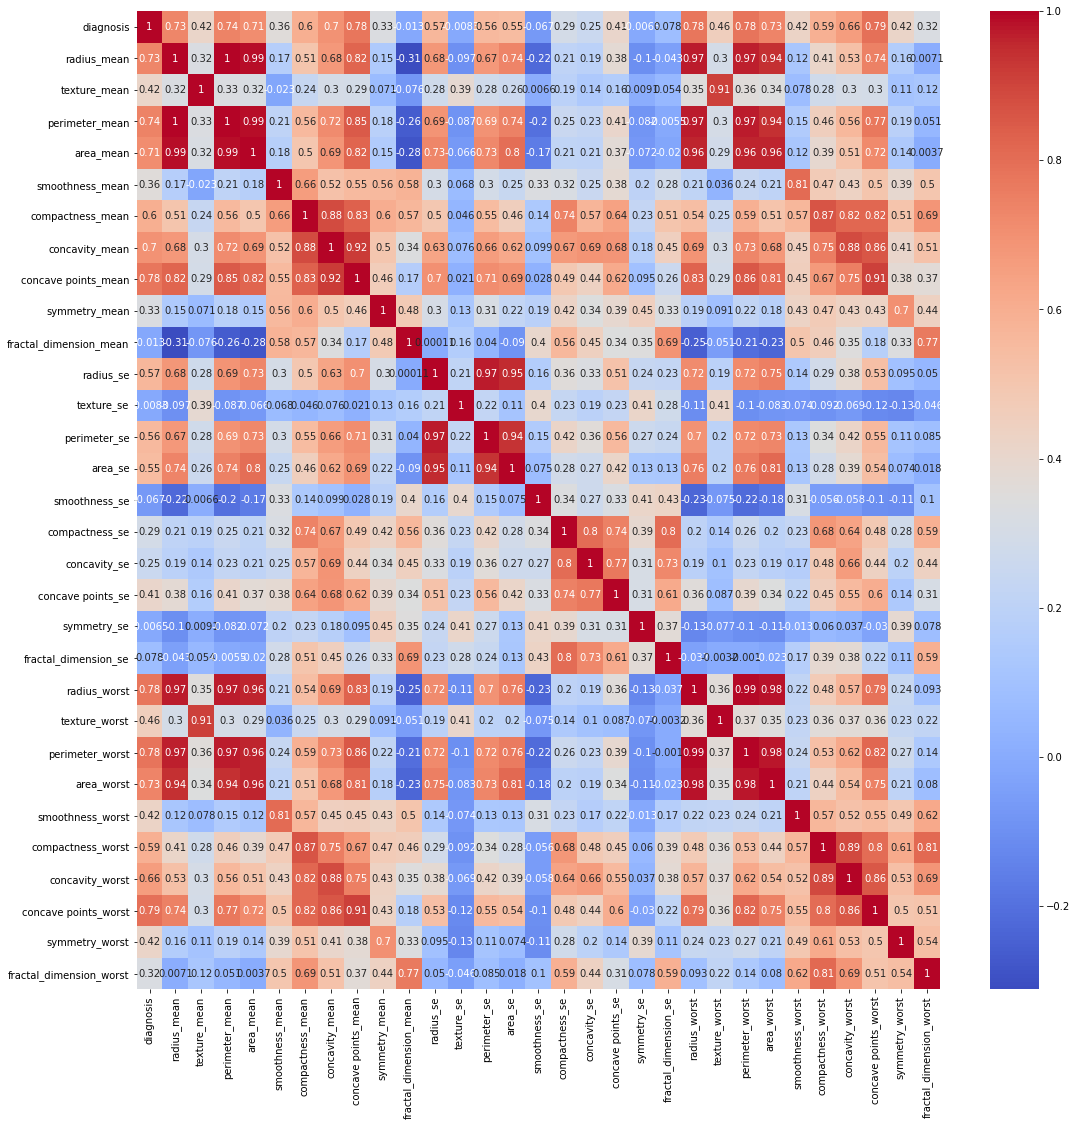

In [5]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

Finding most important features

In [6]:
features = []
for col in df.columns:
    if df['diagnosis'].corr(df[col]) >= 0.5:
        features.append(col)

features


['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [7]:
df_new = df[features]

Prepare data for classification

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [9]:
#dividing the dataframe into training and target features
train_x = df_new.loc[:, df_new.columns != 'diagnosis']
train_x.head()

train_y = pd.DataFrame(df_new.loc[:,"diagnosis"])
train_y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [10]:
#splitting the dataframe and keeping 80% of the data for training and rest 20% for testing
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Logistic Regression

                    precision    recall  f1-score   support

Malignant(Class 0)       0.97      0.97      0.97        71
  Benign (Class 1)       0.95      0.95      0.95        43

          accuracy                           0.96       114
         macro avg       0.96      0.96      0.96       114
      weighted avg       0.96      0.96      0.96       114



C:\Users\Thanos\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


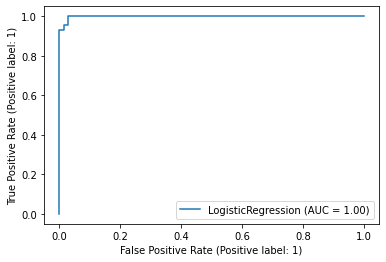

In [12]:
#training the data using Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)

prediction_lr = classifier_lr.predict(x_test)
print(classification_report(y_test, prediction_lr, 
                            target_names = ['Malignant(Class 0)','Benign (Class 1)']))
metrics.plot_roc_curve(classifier_lr, x_test, y_test)

In [13]:
#printing the accuracy for test set
from sklearn.metrics import accuracy_score
print('The Accuracy of the Logistic Regression model is {}'.format(accuracy_score(y_test,prediction_lr)*100))

The Accuracy of the Logistic Regression model is 96.49122807017544


Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



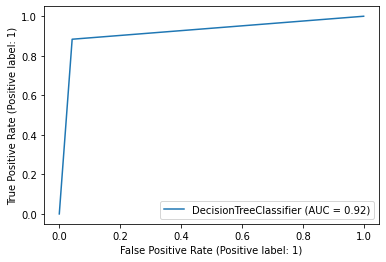

In [14]:
#training the data using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
prediction_dt = tree.predict(x_test)
print(classification_report(y_test, prediction_dt))
metrics.plot_roc_curve(tree, x_test, y_test)

In [15]:
#printing the accuracy for test set
print('The Accuracy of the Decision Tree model is {}'.format(accuracy_score(y_test,prediction_dt)*100))

The Accuracy of the Decision Tree model is 92.98245614035088


Random Forest

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\Thanos\AppData\Local\Temp/ipykernel_14872/3945274452.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


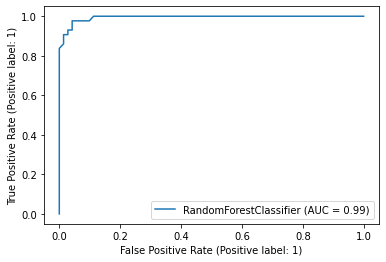

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
prediction_rf = forest.predict(x_test)
print(classification_report(y_test, prediction_rf))
metrics.plot_roc_curve(forest, x_test, y_test)

In [17]:
#printing the accuracy for test set
print('The Accuracy of the Random Forest model is {}'.format(accuracy_score(y_test,prediction_rf)*100))

The Accuracy of the Random Forest model is 95.6140350877193
